In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import keras, os
from keras.models import Sequential
# This gets out neural network as a sequential network.
from keras.layers import Conv2D
#2D for images and 3D for videos
from keras.layers import MaxPool2D
#
from keras.layers import Flatten
#
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
# Image processsing utilities like zoom, flip, rotate, etc
import numpy

In [18]:
import cv2
import keras

# image = cv2.imread('/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')
width, height, channel = (224, 224, 3)
# width, height, channel = image.shape
training_directory = '/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Resized_Dataset/train'
validation_directory = '/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Resized_Dataset/validation'
training_samples = 7209 / 9
print(training_samples)
validation_sample = 1000 - training_samples
epochs = 100
batch_size = 20
if keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, width, height)
else:
    input_shape = (width, height, 3)
# Check if this is necessary :
generate_training_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
generate_testing_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255
)  # We do not want to touch much of testing data
trainer = generate_training_data.flow_from_directory(
    training_directory,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical'
)
validator = generate_testing_data.flow_from_directory(
    validation_directory,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical'
)

801.0
Found 7213 images belonging to 9 classes.
Found 1792 images belonging to 9 classes.


In [19]:
#@title Default title text
# Neural Network:
sequential_model = keras.models.Sequential()
# Extract 32 features from the image for a window of 3x3 for input_shape:
# VGG16 Architecture
# sequential_model.add(keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# sequential_model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# sequential_model.add(keras.layers.Flatten())
# sequential_model.add(keras.layers.Dense(units=4096,activation="relu"))
# sequential_model.add(keras.layers.Dense(units=4096,activation="relu"))
# sequential_model.add(keras.layers.Dense(units=9, activation="softmax"))


# Custom CNN:
sequential_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",
                 input_shape=input_shape))
sequential_model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
sequential_model.add(keras.layers.Dropout(0.25))
sequential_model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
sequential_model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
sequential_model.add(keras.layers.Dropout(0.25))
sequential_model.add(keras.layers.Flatten())
sequential_model.add(keras.layers.Dense(1024, activation="relu"))
sequential_model.add(keras.layers.Dropout(0.5))
sequential_model.add(keras.layers.Dense(9, activation="softmax"))

sequential_model.summary()

adam_optimizer = keras.optimizers.Adam(learning_rate=0.00001, decay=1e-7)
sequential_model.compile(
    loss='categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)
history = sequential_model.fit(
    trainer,
    steps_per_epoch=training_samples // batch_size,
    epochs=epochs,
    validation_data=validator,
    validation_steps=validation_sample // batch_size,
    shuffle=True
)
sequential_model.save('CNN_model.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 52, 52, 128)      

In [20]:
import matplotlib.pyplot as plt


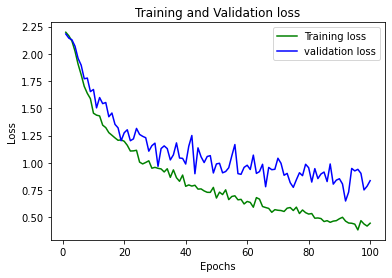

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

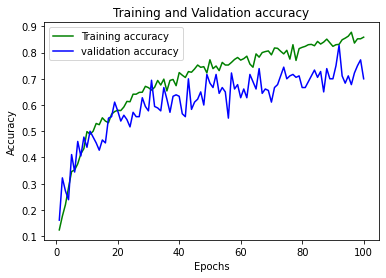

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This part which follows is testing for Ground truth dataset.

In [8]:
# Trial with GTs
# Do not run the block
import cv2
import keras

# image = cv2.imread('/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat/00001.png')
width, height, channel = (224, 224, 1)
# width, height, channel = image.shape
training_directory = '/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Resized_Dataset_GT/train'
validation_directory = '/content/gdrive/MyDrive/Classification Project/Fish_Dataset/Resized_Dataset_GT/validation'
training_samples = 7209 / 9
print(training_samples)
validation_sample = 1000 - training_samples
epochs = 100
batch_size = 40
if keras.backend.image_data_format() == 'channels_first':
    input_shape = (1, width, height)
else:
    input_shape = (width, height, 1)
# Check if this is necessary :
generate_training_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
generate_testing_data = keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255
)  # We do not want to touch much of testing data
trainer = generate_training_data.flow_from_directory(
    training_directory,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical'
)
validator = generate_testing_data.flow_from_directory(
    validation_directory,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical'
)

801.0
Found 7209 images belonging to 9 classes.
Found 1791 images belonging to 9 classes.


In [9]:
# Trial with GTs
# Do not run the block

#@title Default title text
# Neural Network:
sequential_model = keras.models.Sequential()
# Extract 32 features from the image for a window of 3x3 for input_shape:
# CNN:
sequential_model.add(keras.layers.Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
sequential_model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
sequential_model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
sequential_model.add(keras.layers.Flatten())
sequential_model.add(keras.layers.Dense(units=4096,activation="relu"))
sequential_model.add(keras.layers.Dense(units=4096,activation="relu"))
sequential_model.add(keras.layers.Dense(units=9, activation="softmax"))

# sequential_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",
#                  input_shape=input_shape))
# sequential_model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
# sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# sequential_model.add(keras.layers.Dropout(0.25))
# sequential_model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
# sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# sequential_model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
# sequential_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# sequential_model.add(keras.layers.Dropout(0.25))
# sequential_model.add(keras.layers.Flatten())
# sequential_model.add(keras.layers.Dense(1024, activation="relu"))
# sequential_model.add(keras.layers.Dropout(0.5))
# sequential_model.add(keras.layers.Dense(9, activation="softmax"))

sequential_model.summary()
optimizer = keras.optimizers.Adam(learning_rate=0.00001, decay=1e-7)
sequential_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)
history = sequential_model.fit(
    trainer,
    steps_per_epoch=training_samples // batch_size,
    epochs=epochs,
    validation_data=validator,
    validation_steps=validation_sample // batch_size
)
sequential_model.save('/content/gdrive/MyDrive/Classification Project/Fish_Dataset/CNN_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

NotFoundError: ignored